In [23]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from Functions import Correlations, Distributions, Metrics
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('train_clean.csv')

## Modelado

### Feature Engineering

In [25]:
#EnCODING DE VARIABLES CUALITATIVAS
dummies = pd.get_dummies(df['Geography'], dtype=int)
dummies.head()

,France,Germany,Spain
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [26]:
#NORMALIZACION
from sklearn.preprocessing import StandardScaler

#LISTA DE VARIABLES A NORMALIZAR
vars = ['Age','Balance']#'CreditScore',

#INSTANCIA DEL MODELO Y TRANSOFRMACION
std_vars = StandardScaler().fit_transform(df[vars])

#SE CREA DATAFRAME COMPLEMETARIO
std_vars = pd.DataFrame(std_vars, columns=vars)
std_vars.head(3)

,Age,Balance
0,-0.578074,-0.883163
1,-0.578074,-0.883163
2,0.211354,-0.883163


In [27]:
#SELECCION DE VARIABLES
vars = ['NumOfProducts','IsActiveMember','Gender']

#VARIABLES PREDICTIVAS
x = pd.concat([df[vars],
                std_vars,
                dummies], axis=1)

#VARIABLE OBJETIVO
y = df.Exited

### UnderSample

In [28]:
#DISTRIBUCION DE LAS CLASES EN Y
print(f'Cantidad de observaciones con clase 0: {sum(y==0)}')
print(f'Cantidad de observaciones con clase 1: {sum(y==1)}')

Cantidad de observaciones con clase 0: 130113
Cantidad de observaciones con clase 1: 34921


In [29]:
#IMPORTACION DE LIBRERIA
from imblearn.under_sampling import RandomUnderSampler

#PORCENTAJE DE REDUCCION VARIABLE MAYORITARIA
perc_reduce = int(sum(y==0)*0.75)

#SET HIPERPARAMETRO
sampling_strategy = {0:perc_reduce, 1:sum(y==1)}

#INSTANCIA ,ENTRAMIENTO Y TRANSFORMACION DEL MODELO
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
x_under, y_under = rus.fit_resample(x, y)

#RESULTADO
print(f'Cantidad de observaciones con clase 0: {sum(y_under==0)}')
print(f'Cantidad de observaciones con clase 1: {sum(y_under==1)}')


Cantidad de observaciones con clase 0: 97584
Cantidad de observaciones con clase 1: 34921


### OverSample

In [30]:
#IMPORTACION DE LIBRERIA
from imblearn.over_sampling import SMOTE

#PORCENTAJE DE REDUCCION VARIABLE MAYORITARIA
perc_increase = int(sum(y==0)*0.75)

#SET HIPERPARAMETRO
sampling_strategy = {0:sum(y==0), 1:perc_increase}

#INSTANCIA ,ENTRAMIENTO Y TRANSFORMACION DEL MODELO
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
x_over, y_over = smote.fit_resample(x, y)

#RESULTADO
print(f'Cantidad de observaciones con clase 0: {sum(y_over==0)}')
print(f'Cantidad de observaciones con clase 1: {sum(y_over==1)}')

Cantidad de observaciones con clase 0: 130113
Cantidad de observaciones con clase 1: 97584


### KNN - Entrenamiento y validacion simple del modelo

#### Test UnderSample

In [31]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.33, stratify=y_under,random_state=42)

#IMPORTACION DE LIBRERIA
from sklearn.neighbors import KNeighborsClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = KNeighborsClassifier(n_neighbors=35)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8447


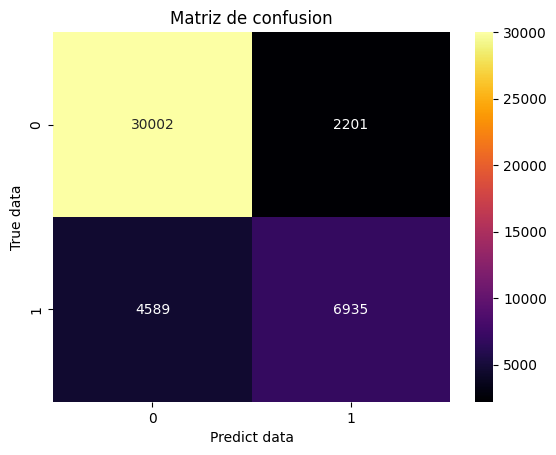

In [32]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [33]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     32203
           1       0.76      0.60      0.67     11524

    accuracy                           0.84     43727
   macro avg       0.81      0.77      0.78     43727
weighted avg       0.84      0.84      0.84     43727



In [34]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8791


In [35]:
#SE AGREGA METRICA A LA LISTA
metrics_list = []
metrics_list.append(Metrics().get_metrics('KNN', 'UnderSample', y_test, y_pred, y_prob))

#### Test OverSample

In [36]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.33, stratify=y_over,random_state=42)

#IMPORTACION DE LIBRERIA
from sklearn.neighbors import KNeighborsClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = KNeighborsClassifier(n_neighbors=35)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8127


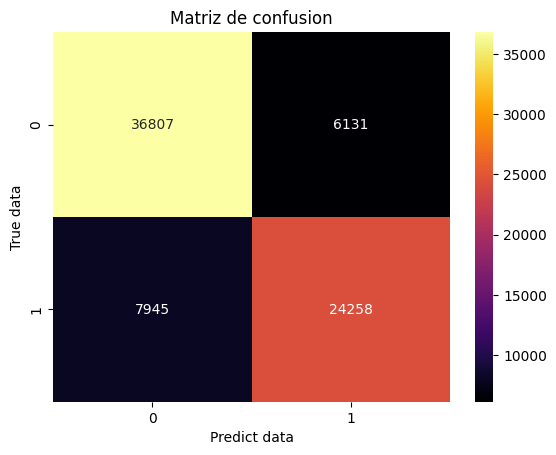

In [37]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [38]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     42938
           1       0.80      0.75      0.78     32203

    accuracy                           0.81     75141
   macro avg       0.81      0.81      0.81     75141
weighted avg       0.81      0.81      0.81     75141



In [39]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8907


In [40]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('KNN', 'OverSample', y_test, y_pred, y_prob))

### Random Forest - Entrenamiento y validacion simple del modelo

#### Test UnderSample

In [41]:
#IMPOTRACION DE MODELO PARA TEST DE PARAMETROS
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_param = param_grid = {
    'criterion' : ['entropy'],
    'n_estimators': [200, 300],
    'max_depth': [10, 18, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False],
    'random_state': [42]
}

In [42]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.33, stratify=y_under,random_state=42)

#IMPORTACION DE LIBRERIA
from sklearn.ensemble import RandomForestClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = RandomForestClassifier( bootstrap=True,
                                criterion='entropy',
                                max_depth=10,
                                min_samples_leaf=4,
                                min_samples_split=5,
                                n_estimators=200,
                                random_state=42)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8470


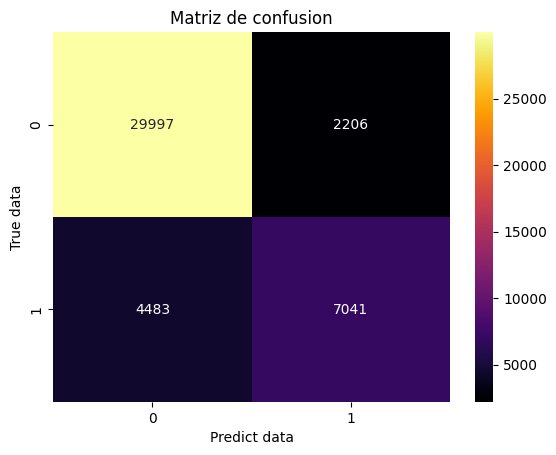

In [43]:
#GRAFICO DE MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [44]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     32203
           1       0.76      0.61      0.68     11524

    accuracy                           0.85     43727
   macro avg       0.82      0.77      0.79     43727
weighted avg       0.84      0.85      0.84     43727



In [45]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8865


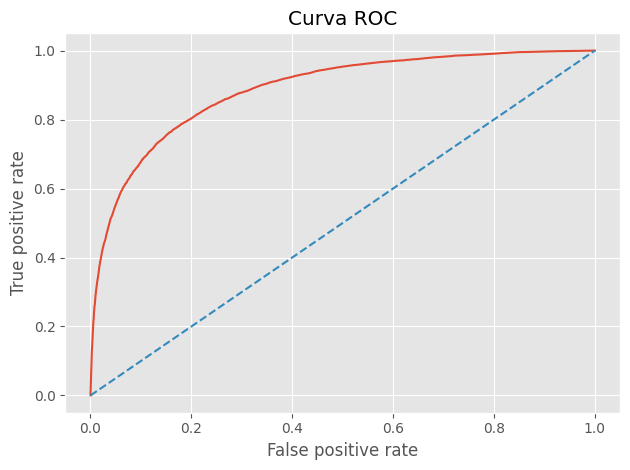

In [46]:
#PLOT CURVE ROC
Metrics().plot_roc_curve(y_test, y_prob)

In [47]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('RandomForest', 'UnderSample', y_test, y_pred, y_prob))

#### Test OverSample

In [48]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.33, stratify=y_over,random_state=42)

#IMPORTACION DE LIBRERIA
from sklearn.ensemble import RandomForestClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = RandomForestClassifier( bootstrap=True,
                                criterion='entropy',
                                max_depth=10,
                                min_samples_leaf=4,
                                min_samples_split=5,
                                n_estimators=200,
                                random_state=42)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8173


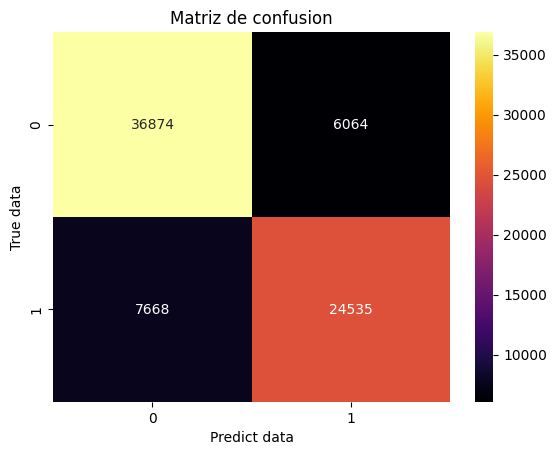

In [49]:
#GRAFICO DE MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [50]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     42938
           1       0.80      0.76      0.78     32203

    accuracy                           0.82     75141
   macro avg       0.81      0.81      0.81     75141
weighted avg       0.82      0.82      0.82     75141



In [51]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8939


In [52]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('RandomForest', 'OverSample', y_test, y_pred, y_prob))

### XG-Boost - Entrenamiento y validacion simple del modelo

#### Test UnderSample

In [53]:
#IMPOTRACION DE MODELO PARA TEST DE PARAMETROS
from sklearn.model_selection import GridSearchCV

#GRILLA DE PARAMETROS PARA TESTEAR
param_grid = {
    'objective' :['binary:logistic'],
    'max_depth': [10, 15],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [9, 15],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0.1, 0.2],
    'random_state': [47]
}

In [54]:
#IMPORTACION MODELO DE BOOOSTING
from xgboost import XGBClassifier

#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.33, stratify=y_under,random_state=42)

model = XGBClassifier( objective = 'binary:logistic',
                       max_depth = 10,
                       learning_rate = 0.2,
                       n_estimators = 15,
                       subsample = 0.9,
                       colsample_bytree = 0.8,
                       gamma = 0.2,
                       random_state = 47)

#ENTRENAMIENTO
model.fit(X_train,y_train)

#PREDICCION
y_pred = model.predict(X_test)

#SCORE
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8473


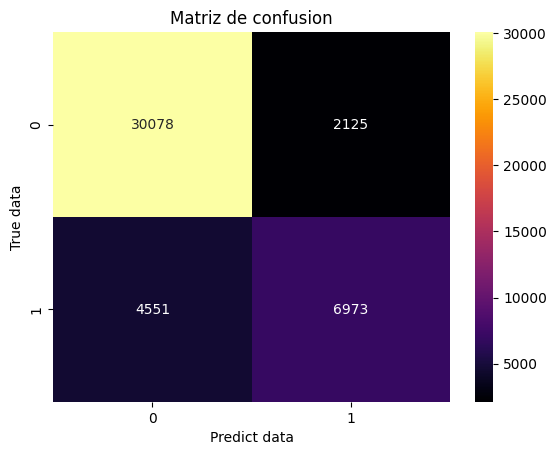

In [55]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [56]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     32203
           1       0.77      0.61      0.68     11524

    accuracy                           0.85     43727
   macro avg       0.82      0.77      0.79     43727
weighted avg       0.84      0.85      0.84     43727



In [57]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8865


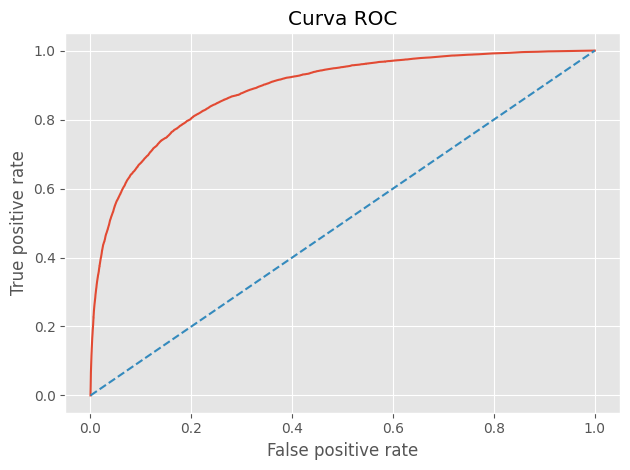

In [58]:
#PLOT CURVE ROC
Metrics().plot_roc_curve(y_test, y_prob)

In [59]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('XGB', 'UnderSample', y_test, y_pred, y_prob))

#### Test OverSample

In [71]:
#DIVISION DE DATOS PARA TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.33, stratify=y_over,random_state=42)

model = XGBClassifier( objective = 'binary:logistic',
                       max_depth = 10,
                       learning_rate = 0.2,
                       n_estimators = 15,
                       subsample = 0.9,
                       colsample_bytree = 0.8,
                       gamma = 0.2,
                       random_state = 47)

#ENTRENAMIENTO
model.fit(X_train,y_train)

#PREDICCION
y_pred = model.predict(X_test)

#SCORE
accuracy = accuracy_score(y_true=y_test ,y_pred=y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8219


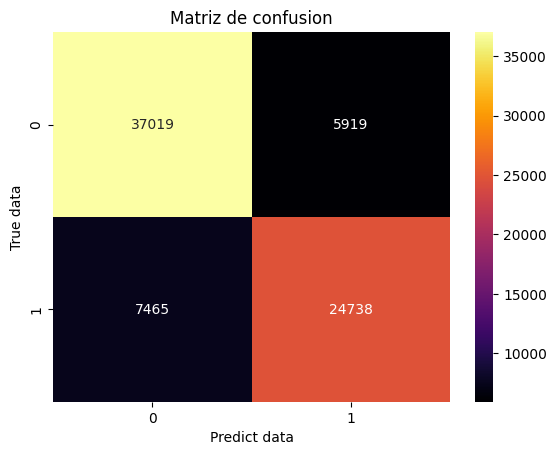

In [61]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_confusion_matrix_dicotomic(y_test, y_pred, None, None)

In [72]:
#REPORTE
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     42938
           1       0.81      0.77      0.79     32203

    accuracy                           0.82     75141
   macro avg       0.82      0.82      0.82     75141
weighted avg       0.82      0.82      0.82     75141



In [63]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.8977


In [64]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('XGB', 'OverSample', y_test, y_pred, y_prob))

### Evaluacion de metricas

In [65]:
df_metrics = pd.DataFrame(metrics_list)
df_metrics

,model,sample,accuracy,rog_score,precision_0,precision_1,recall_0,recall_1,f1_score_0,f1_score_1
0,KNN,UnderSample,0.844718,0.879071,0.867335,0.759085,0.931652,0.601788,0.898344,0.671346
1,KNN,OverSample,0.812672,0.890667,0.822466,0.798249,0.857213,0.753284,0.839480,0.775115
2,RandomForest,UnderSample,0.847028,0.886456,0.869983,0.761436,0.931497,0.610986,0.899690,0.677964
3,RandomForest,OverSample,0.817250,0.893927,0.827848,0.801824,0.858773,0.761886,0.843027,0.781345
4,XGB,UnderSample,0.847325,0.886452,0.868578,0.766432,0.934012,0.605085,0.900108,0.676268
5,XGB,OverSample,0.821882,0.897708,0.832187,0.806928,0.862150,0.768189,0.846904,0.787082


### Prediccion

In [73]:
df_test = pd.read_csv('test.csv')

In [74]:
#TRANSFORMACION VARIABLE GENDER
df_test.loc[df_test.Gender == 'Female', 'Gender'] = '0'
df_test.loc[df_test.Gender == 'Male', 'Gender'] = '1'
df_test.Gender = df_test.Gender.astype(int)
df_test.Gender.value_counts()

#TRANSFORMACION DE VARIABLES CATEGORICAS
dummies = pd.get_dummies(df_test['Geography'], dtype=int)
dummies.head()

#LISTA DE VARIABLES A NORMALIZAR
vars = ['Age','Balance']

#INSTANCIA DEL MODELO Y TRANSOFRMACION
std_vars = StandardScaler().fit_transform(df_test[vars])

#SE CREA DATAFRAME COMPLEMETARIO
std_vars = pd.DataFrame(std_vars, columns=vars)

#SELECCION DE VARIABLES
vars = ['NumOfProducts','IsActiveMember','Gender']

#VARIABLES PREDICTIVAS
x = pd.concat([df_test[vars],
                std_vars,
                dummies], axis=1)

#PREDICCION
y_pred = model.predict(x)

In [75]:
#CONCATENACION DE ARCHIVO PARA EXPORTAR
y_pred = pd.Series(y_pred, name='Exited')
sample_submission = pd.concat([df_test.id, y_pred], axis=1)

In [78]:
#sample_submission.to_csv('submission.csv', index=False)

In [77]:
sample_submission.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,1
4,165038,1
